### Evaluating Policies

Here we will examine the performance to three policies for the Cart Pole problem. To examine the performance of a policy we will repeatedly run the policy for a number of episodes. As noted before, an episode of Cart Pole begins, using the reset function, and then runs until the pole is no longer balanced, which is indicated when the terminated flag returned from the step functions is True. To get a statistical sampling, each policy is run 10,000 times. This is a paramter that can be changed. The length of each episode is then stored in a list. The length of each episode is also the reward; a reward of 1.0 is received for each step where the pole remains balanced.

From the list of episode lengths the minimum, maxiumum, and average episode lengths are computed and printed. A histogram that shows the distribution of episode lengths is created and finally a scatter plot of the episode length versus iteration is created. 

The first policy that we will examine is the random policy. At each step of each episode an action is selected randomly. The second policy alternates between moving left and right. Neither of these policies use observational values to select an action. 

The third policy will actually be a collection of policies that depend on observational values. Four random numbers are generated and then the inner product with the observation values is computed. If the result of the inner product is less than zero, then action 0 is selected. If the inner is greater than zero, the action 1 is selected. This policy is then evaluated and its average performance computed. Next, another set of random values is generated and used to create a new inner product policy. If it's average performance exceeds the previous policies performance it is selected as the best policy. This process until a specified number of policies is evaluated. 





In [1]:
from matplotlib import pyplot as plt
import random

#import OpenAI Gym
import gymnasium as gym

In [2]:
#create CartPole environment
env = gym.make('CartPole-v1')

### Evaluating the performance of the random policy

Let's evaluate the performance of a random policy for the Cart Pole problem. To do so, run the CartPole and record, in a Python list, how many steps were taken before termination of the MDP. 

In [3]:
n_episodes = 10000
number_of_steps = []

for _ in range(n_episodes):
    _,_ = env.reset()
    terminated = False
    i = 0
    while not terminated:
        action = env.action_space.sample()
        _,_,terminated,_,_ = env.step(action)
        i += 1
    number_of_steps.append(i)

print(f"Minimum length: {min(number_of_steps)}")
print(f"Maximum length: {max(number_of_steps)}")
print(f"Average length: {sum(number_of_steps)/len(number_of_steps)}")
    

Minimum length: 8
Maximum length: 114
Average length: 22.2039


Next let's create a histogram of the values in the number of steps list. This show the distribution of the number of steps

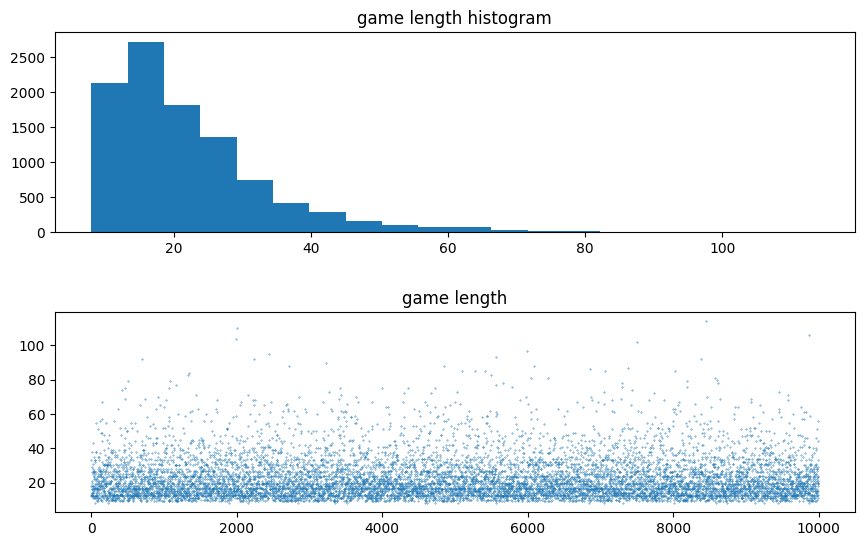

In [4]:
_, axs = plt.subplots(2,figsize=(10,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axs[0].hist(number_of_steps, 20)
axs[0].set_title("game length histogram")

iter_vals = [x for x in range(len(number_of_steps))]
axs[1].scatter(iter_vals,number_of_steps,s=0.1)
axs[1].set_title("game length")

plt.show()

### Policy that alternates between moving left and right

The next policy alternates between moving left and right for each step in the MDP.

In [5]:
n_episodes = 10000
number_of_steps = []

for _ in range(n_episodes):
    _,_ = env.reset()
    terminated = False
    i = 0
    while not terminated:
        if i % 2 == 0:
            action = 0
        else:
            action = 1
        _,_,terminated,_,_ = env.step(action)
        i += 1
    number_of_steps.append(i)

print(f"Minimum length: {min(number_of_steps)}")
print(f"Maximum length: {max(number_of_steps)}")
print(f"Average length: {sum(number_of_steps)/len(number_of_steps)}")

Minimum length: 20
Maximum length: 163
Average length: 37.622


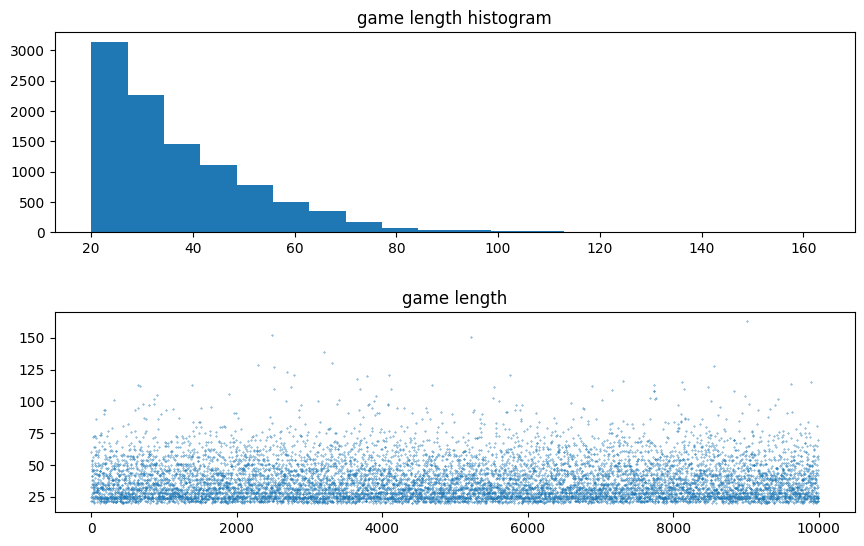

In [6]:
_, axs = plt.subplots(2,figsize=(10,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axs[0].hist(number_of_steps, 20)
axs[0].set_title("game length histogram")

iter_vals = [x for x in range(len(number_of_steps))]
axs[1].scatter(iter_vals,number_of_steps,s=0.1)
axs[1].set_title("game length")

plt.show()